In [1]:
from google.colab import drive

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
USER_NAME = 'Siqiao'
from pathlib import Path
IMAGE_DIR = Path('/content/drive/Shareddrives/AC297R/images_new')

In [15]:
userfile = IMAGE_DIR / f'scores-{USER_NAME}.csv'

if os.path.exists(userfile):
    df = pd.read_csv(userfile, )
else:
    df = pd.read_csv('/content/drive/Shareddrives/AC297R/trial_metadata_new_csv.csv')
    df_fragments = [df[df['Id'] == id].sample(frac=1.0, random_state=1) for id in [1, 2, 3, 4, 5]]
    df = pd.concat(df_fragments)
        
    df['scores'] = -1.0

In [16]:
df.head()

,Timestamp (From Photo)(MMDD-YYYY-HHMMSS),Id,Image Id(Id-Timestamp),Temperature (°F),"Activity Level (Categorical), i.e none, light, intense",Applied Lotion/Makeup\n(Boolean),Intervention\n(Boolean),Unnamed: 7,scores
0,1026-2022-123018,1,1-1026-2022-123018.jpg,76,None,False,True,NaN,0.6
1,1023-2022-001449,1,1-1023-2022-001449.jpg,76,Light,False,True,NaN,0.8
2,1028-2022-002823,1,1-1028-2022-002823.jpg,77,None,False,False,NaN,0.2
3,1027-2022-125011,1,1-1027-2022-125011.jpg,77,None,False,False,NaN,0.5
4,1020-2022-013420,1,1-1020-2022-013420.jpg,76,None,False,False,NaN,0.3


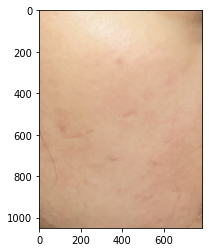

Score (0~1):
0.3


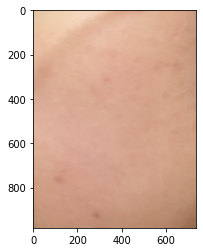

Score (0~1):
0.2


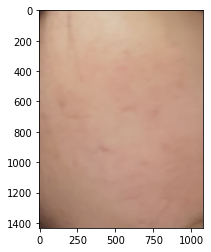

Score (0~1):
0.3


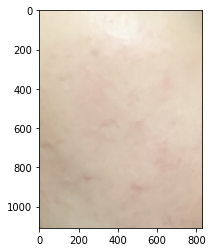

Score (0~1):
0.5


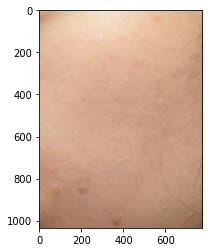

Score (0~1):
0.3


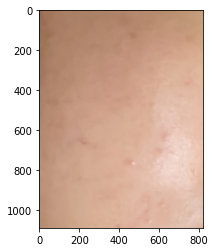

Score (0~1):
0.3


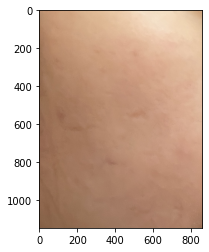

Score (0~1):
0.2


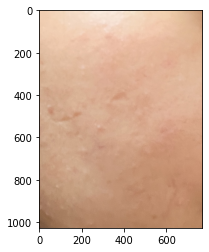

Score (0~1):
0.4


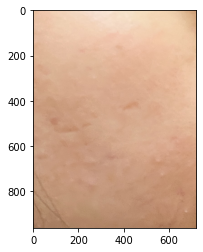

Score (0~1):
0.3


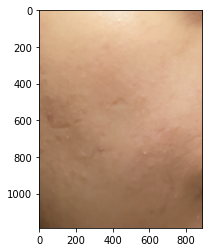

Score (0~1):
0.3


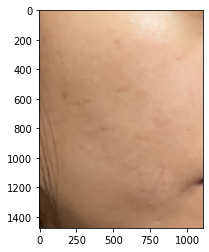

Score (0~1):
0.4


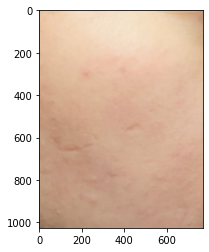

Score (0~1):
0.3


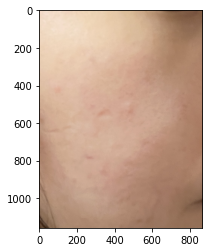

Score (0~1):
0.3


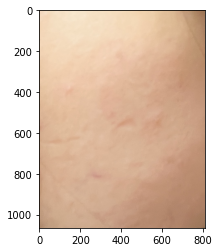

Score (0~1):
0.2


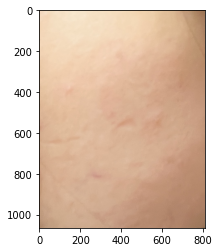

In [ ]:
import time
from IPython import display

# plt.figure()

for i, row in df.iterrows():
    fn = row['Image Id(Id-Timestamp)']
    if row['scores'] != -1:
        continue
    picture_path = IMAGE_DIR / fn[0] / fn
    if not os.path.exists(picture_path):
        print(picture_path)
    # print(picture_path, 'pass')
    try:
        with open(picture_path, 'rb') as f:
            im = Image.open(f)
            # plt.cla()
            plt.imshow(np.array(im))
            display.display(plt.gcf())
            time.sleep(1)

            x = float(input('Score (0~1):\n'))
            df.at[i, 'scores'] = x
            
            # display.clear_output(wait=True)
        # break
    except Exception as e:
        print('fail', e)

In [ ]:
df.to_csv(IMAGE_DIR / f'scores-{USER_NAME}.csv', index=False)

In [17]:
# scale score
# df['scores'] = df.groupby(['Id'])['scores'].apply(lambda x: (x-min(x))/(max(x)-min(x)))
# df.to_csv(IMAGE_DIR / f'scores-scaled-{USER_NAME}.csv', index=False)